## Problem Statement 1

### import Libraries

In [1]:
import pandas as pd 
import numpy as np
from sklearn import linear_model #machine learning
import matplotlib.pyplot as plt
import seaborn as sns

### ignore warnings

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
### read Csv file 
df=pd.read_csv("50_startups.csv")

### EDA 

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df[df.duplicated()].values

array([], shape=(0, 5), dtype=object)

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.shape

(50, 5)

In [12]:
df.drop("State",axis=1,inplace=True)

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [14]:
df.shape

(50, 4)

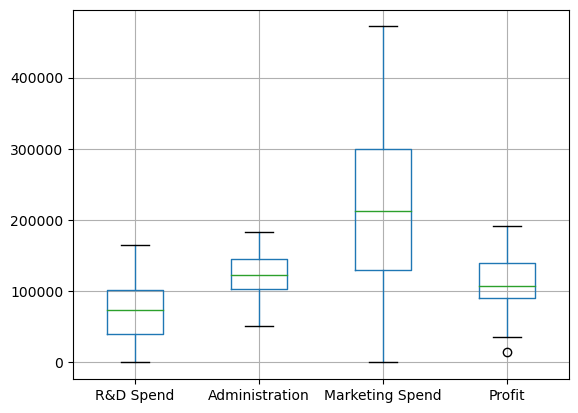

In [15]:
df.boxplot(grid=True)
plt.show()

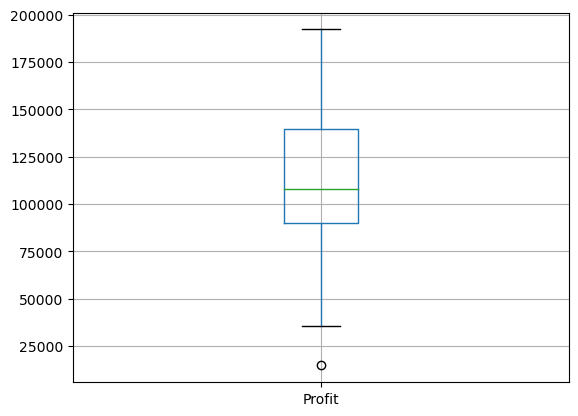

In [16]:
df.boxplot(column=["Profit"],grid=True)
plt.show()

In [17]:
Outlier=df[df.Profit<=25000]
Outlier

,R&D Spend,Administration,Marketing Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [18]:
df.drop(index=49,inplace=True)


In [19]:
df.shape

(49, 4)

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [21]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


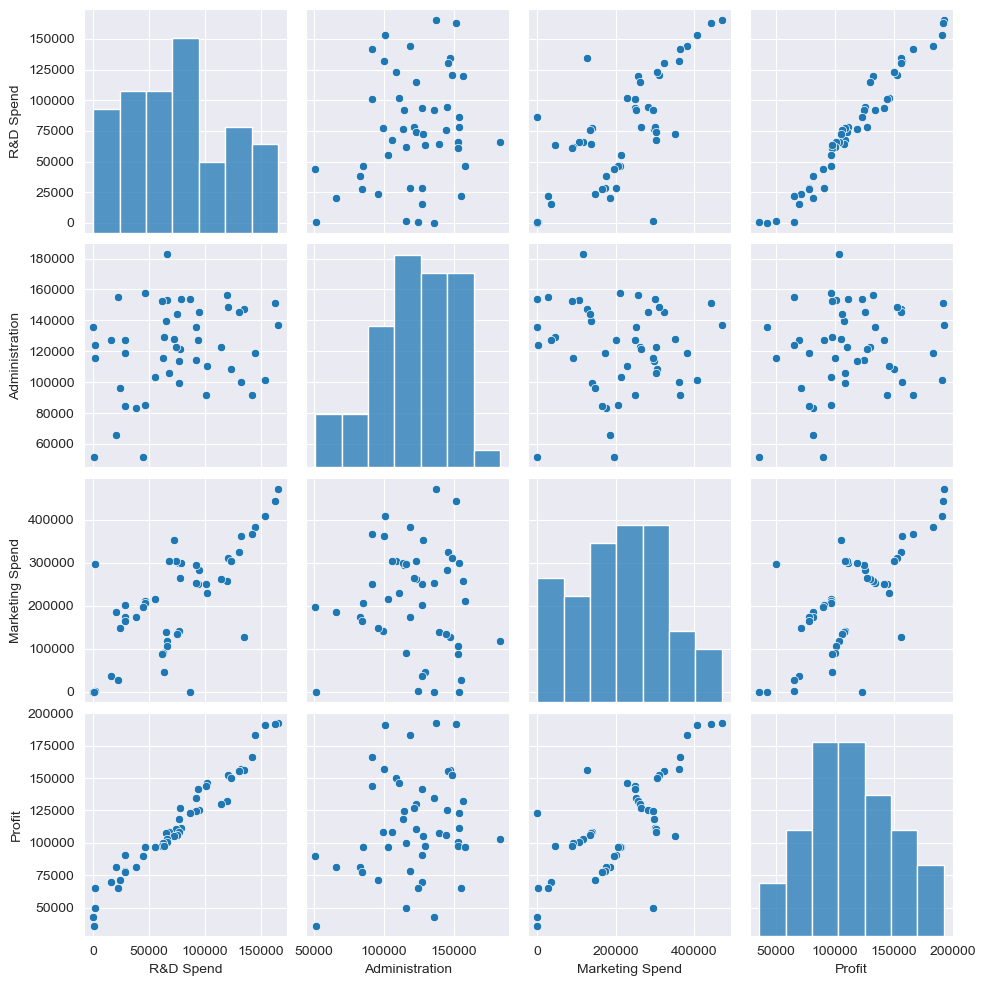

In [22]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

In [23]:
df=df.rename({"R&D Spend":"Spend","Marketing Spend":"Marketing_Spend"},axis=1)
df[0:5]

,Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# First Model Building

In [24]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df).fit()

In [25]:
#Coefficients
model.params

Intercept          52382.439251
Administration        -0.022201
Marketing_Spend        0.025234
Spend                  0.783002
dtype: float64

In [26]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           9.450782
Administration     -0.517889
Marketing_Spend     1.825383
Spend              20.469501
dtype: float64 
 Intercept          2.960000e-12
Administration     6.070728e-01
Marketing_Spend    7.458443e-02
Spend              1.971077e-24
dtype: float64


In [27]:
### The P value of all independent value has less than 0.05 so all are significant

In [28]:
#Build model
#import statsmodels.formula.api as smf 
#model = smf.ols('Profit~Administration+Marketing_Spend',data=df).fit


In [29]:
#R squared values MLR
(model.rsquared)

0.9613162435129847

In [30]:
#Build model
#import statsmodels.formula.api as smf 
#model = smf.ols('Profit~Administration+Spend',data=df).fit()


In [31]:
#R squared values MLR
#(model.rsquared,model.rsquared_adj,model.aic)


# Calculating VIF

In [32]:
rsq_Administration = smf.ols('Administration~Spend+Marketing_Spend',data=df).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Spend = smf.ols('Spend~Marketing_Spend+Administration',data=df).fit().rsquared  
vif_Spend = 1/(1-rsq_Spend) 

rsq_Marketing_Spend= smf.ols('Marketing_Spend~+Administration+Spend',data=df).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 


# Storing vif values in a data frame
d1 = {'Variables':['Administration','Spend','Marketing_Spend'],'VIF':[vif_Administration,vif_Spend,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175172
1,Spend,2.377754
2,Marketing_Spend,2.239957


## All Independet value have less than 5 VIF value So there is no any Multicollinearity essue

# AIC

In [33]:
#Build model with Wt
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df).fit()
f'AIC:{model.aic}, rsq_model:{model.rsquared}'

'AIC:1020.5652974526367, rsq_model:0.9613162435129847'

# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)

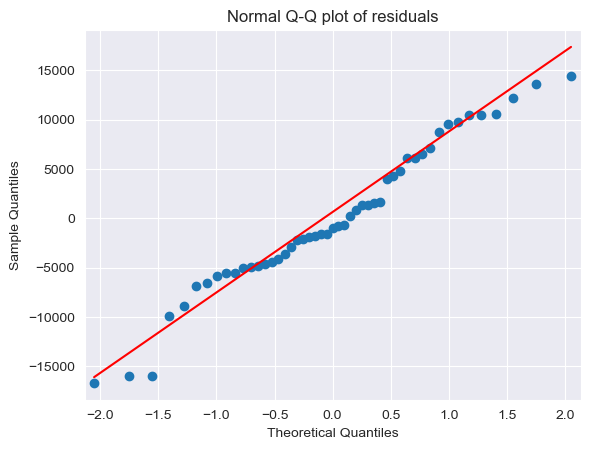

In [34]:
import statsmodels.api as sm

model = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [35]:
list(np.where(model.resid<(-12000))) 

[array([14, 15, 48], dtype=int64)]

In [36]:
list(np.where(model.resid>(13000)))

[array([36, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [37]:
model = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df).fit()


In [38]:
def get_standardized_values( vals ): # user define function 
                                                               
    return (vals - vals.mean())/vals.std()

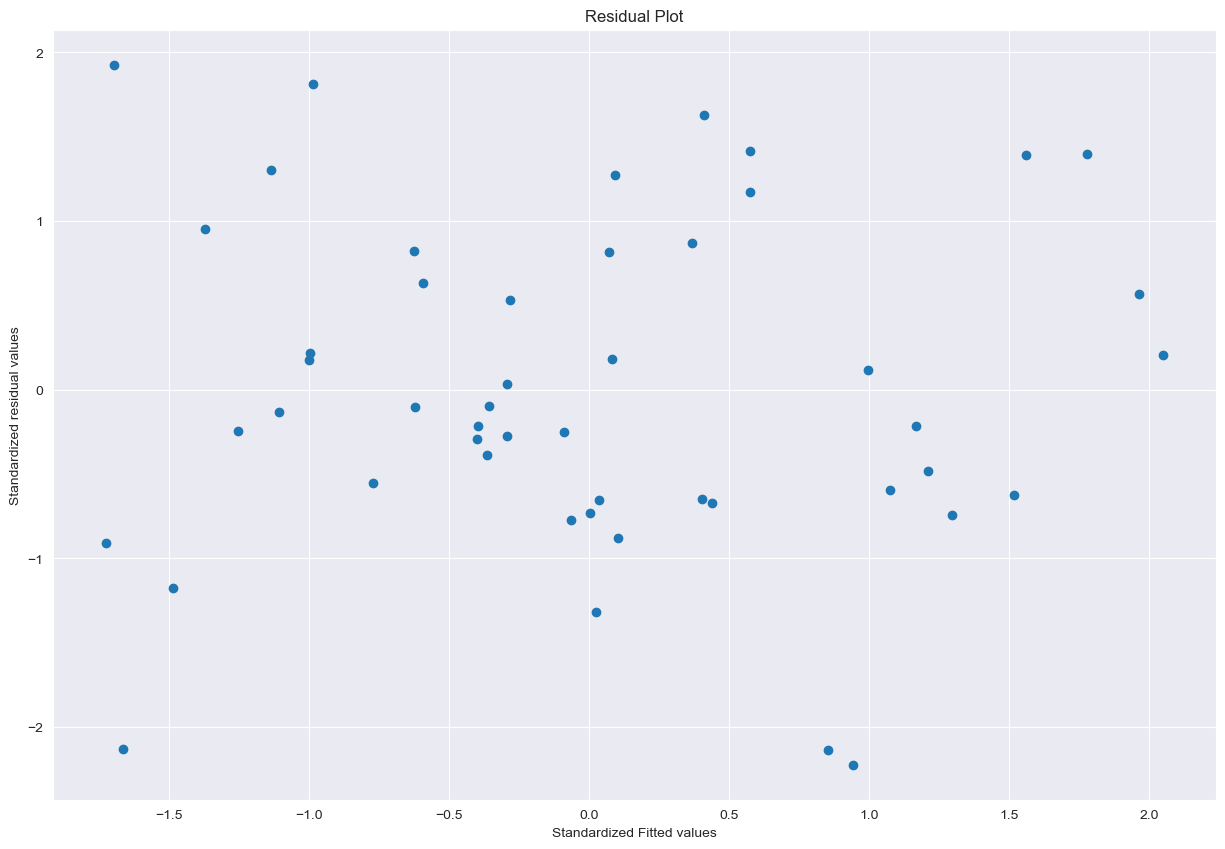

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


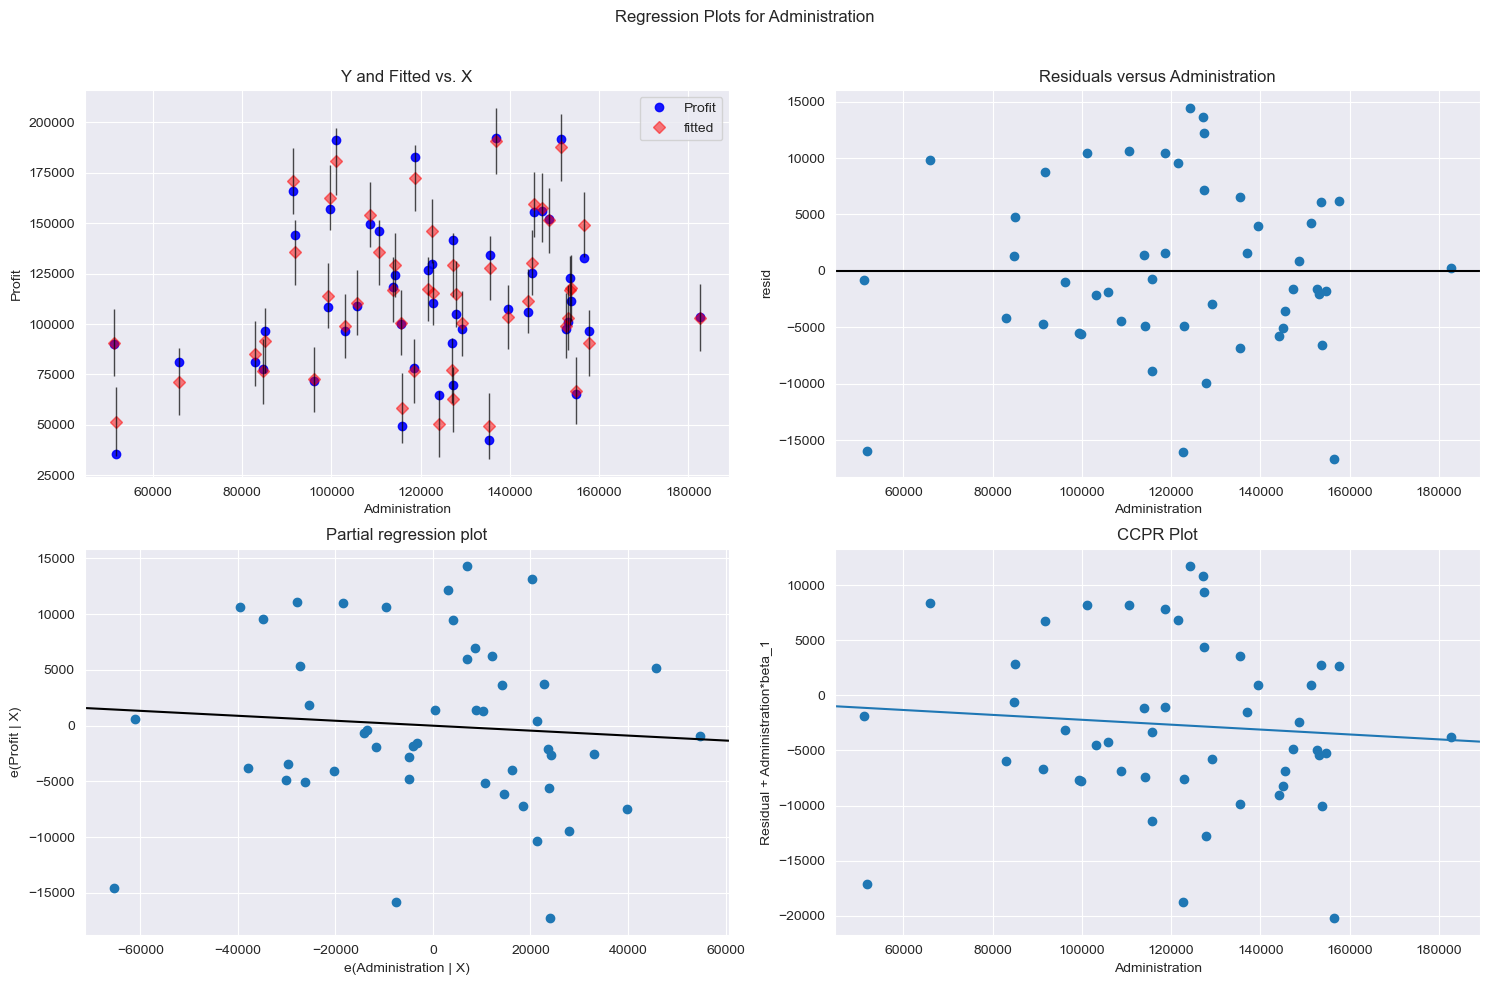

In [40]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

## CCPR - component plus residual plot
# A component residual plot adds a line indicating where the line of best fit lies. 
# A significant difference between the residual line and the component line 
# indicates that the predictor does not have a linear relationship with the dependent variable.

eval_env: 1


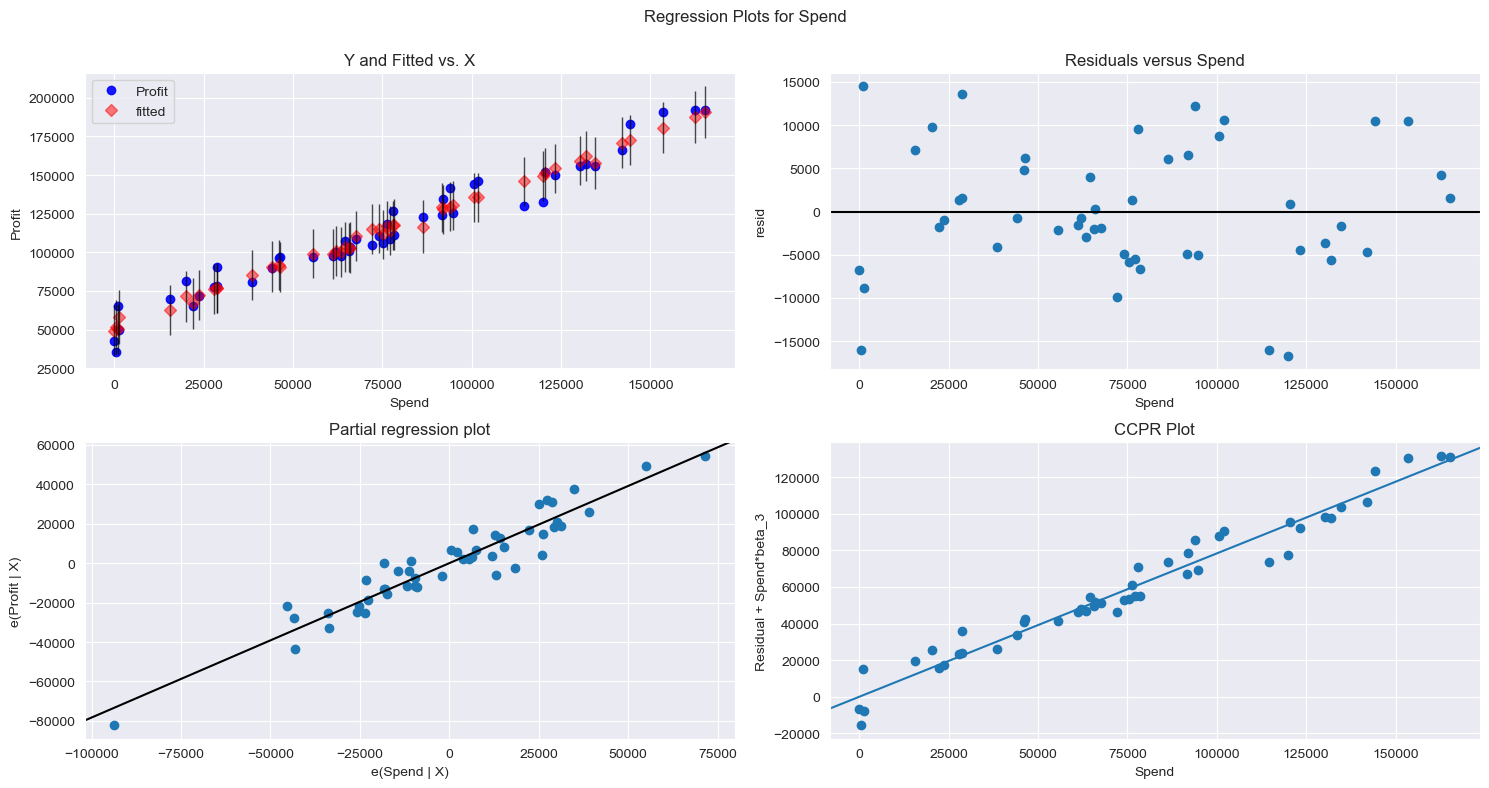

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Spend", fig=fig)
plt.show()

eval_env: 1


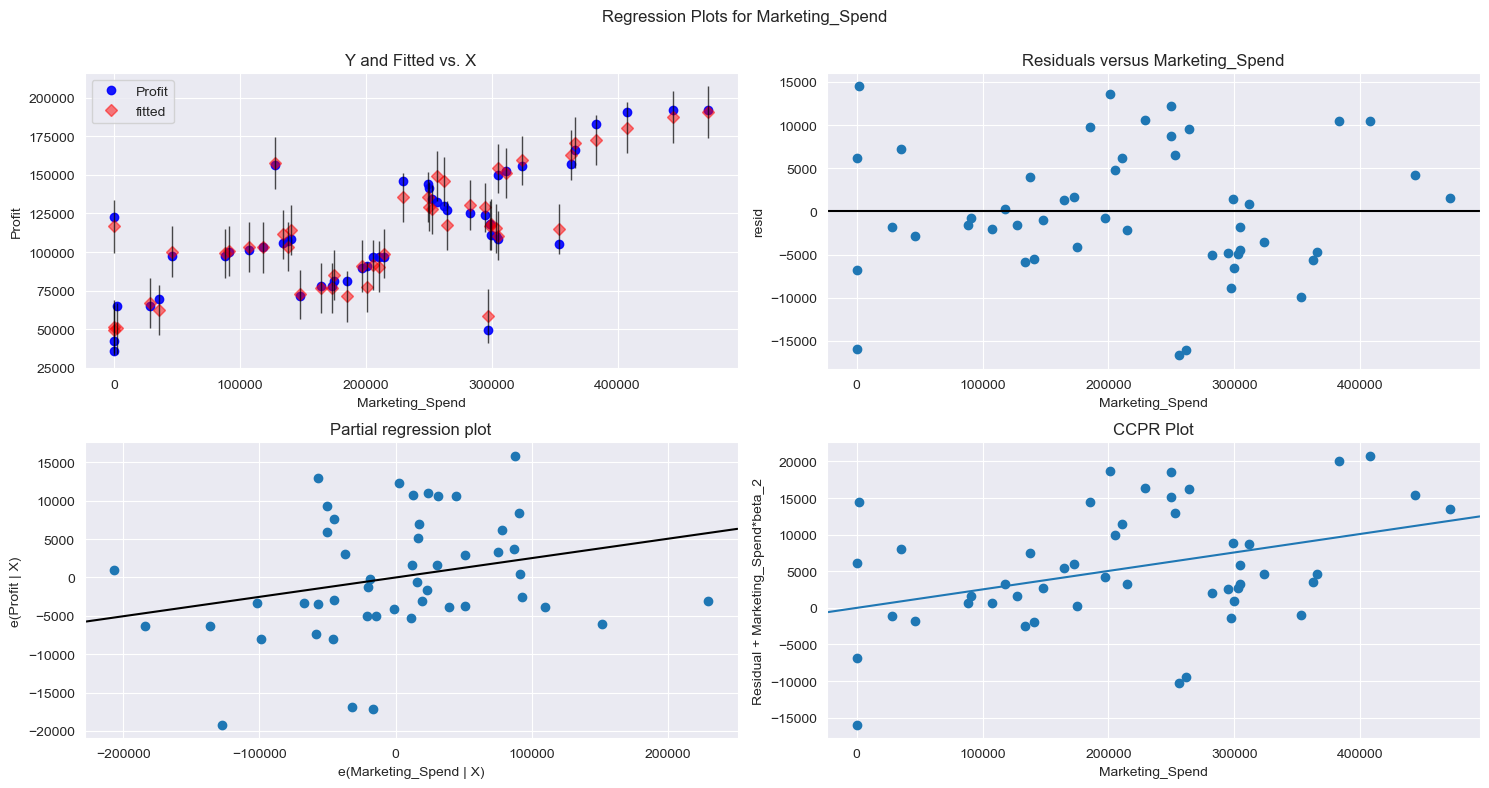

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance




In [43]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

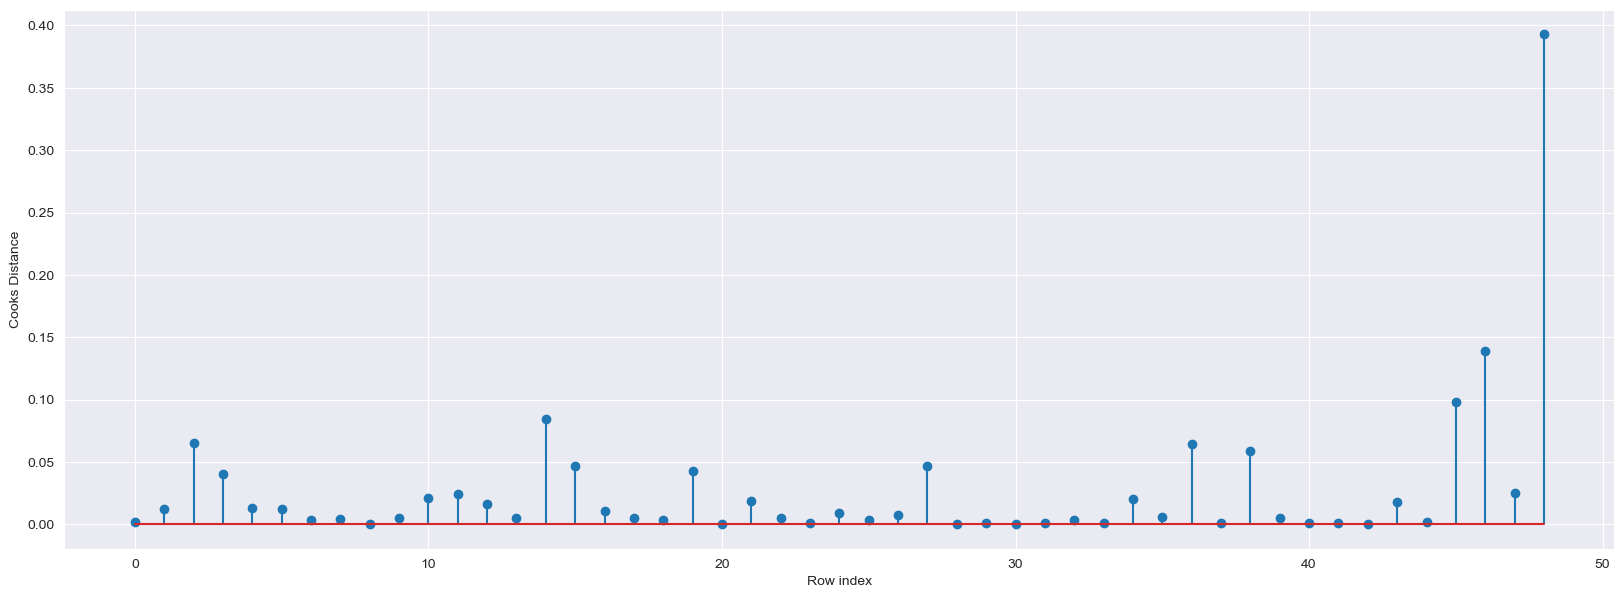

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:

(np.argmax(c),np.max(c)) # 48 is index number and 0.39 is cook's distance

(48, 0.39274420556321654)

## High Influence points

In [46]:
k = df.shape[1] # k is no of variables
n = df.shape[0] # n is no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30612244897959184

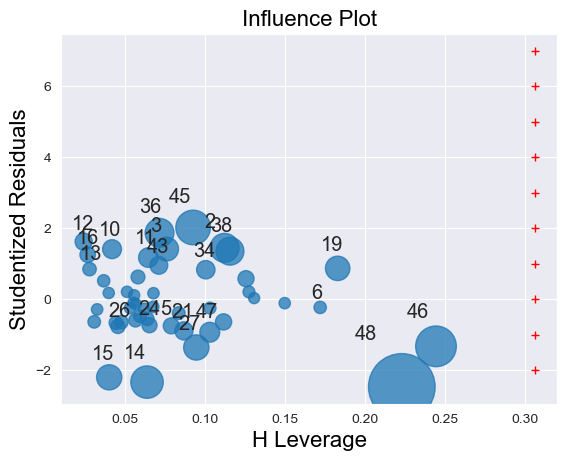

In [47]:
 from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

# Model 2 ( sqrt Transformation)


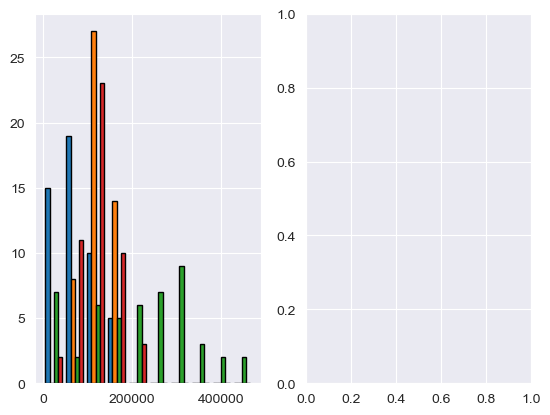

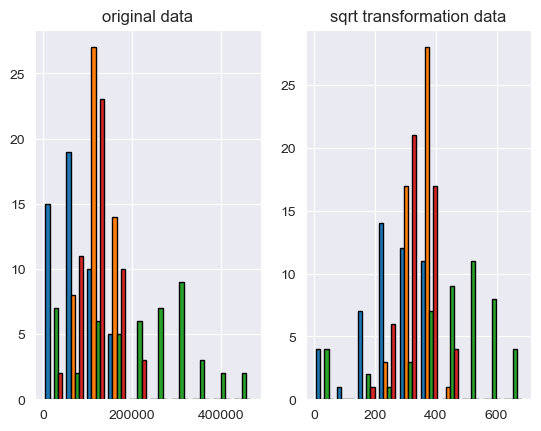

In [49]:
df_sqrt=np.sqrt(df)
#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_sqrt,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('sqrt transformation data')
plt.show()

In [50]:
#Build model
import statsmodels.formula.api as smf 
model2 = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df_sqrt).fit()

In [51]:
#Coefficients
model2.params

Intercept          187.765847
Administration      -0.004093
Marketing_Spend      0.023517
Spend                0.532897
dtype: float64

In [52]:
#t and p-Values
print(model2.tvalues, '\n', model2.pvalues)

Intercept           9.878664
Administration     -0.074918
Marketing_Spend     1.313491
Spend              16.712125
dtype: float64 
 Intercept          7.612261e-13
Administration     9.406118e-01
Marketing_Spend    1.956755e-01
Spend              6.382710e-21
dtype: float64


In [53]:
#R squared values MLR
(model2.rsquared,model2.rsquared_adj)


(0.9375364559365452, 0.9333722196656482)

# VIF

In [54]:
rsq_Administration = smf.ols('Administration~Spend+Marketing_Spend',data=df_sqrt).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Spend = smf.ols('Spend~Marketing_Spend+Administration',data=df_sqrt).fit().rsquared  
vif_Spend = 1/(1-rsq_Spend) 

rsq_Marketing_Spend= smf.ols('Marketing_Spend~+Administration+Spend',data=df_sqrt).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 


# Storing vif values in a data frame
d1 = {'Variables':['Administration','Spend','Marketing_Spend'],'VIF':[vif_Administration,vif_Spend,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175012
1,Spend,2.185200
2,Marketing_Spend,2.019764


In [55]:
# the VIF value of all independent variable in model 2 is less then 5 so there is no multicollinearity essue

## Detecting Influencers/Outliers
### cooks distance

In [57]:


model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

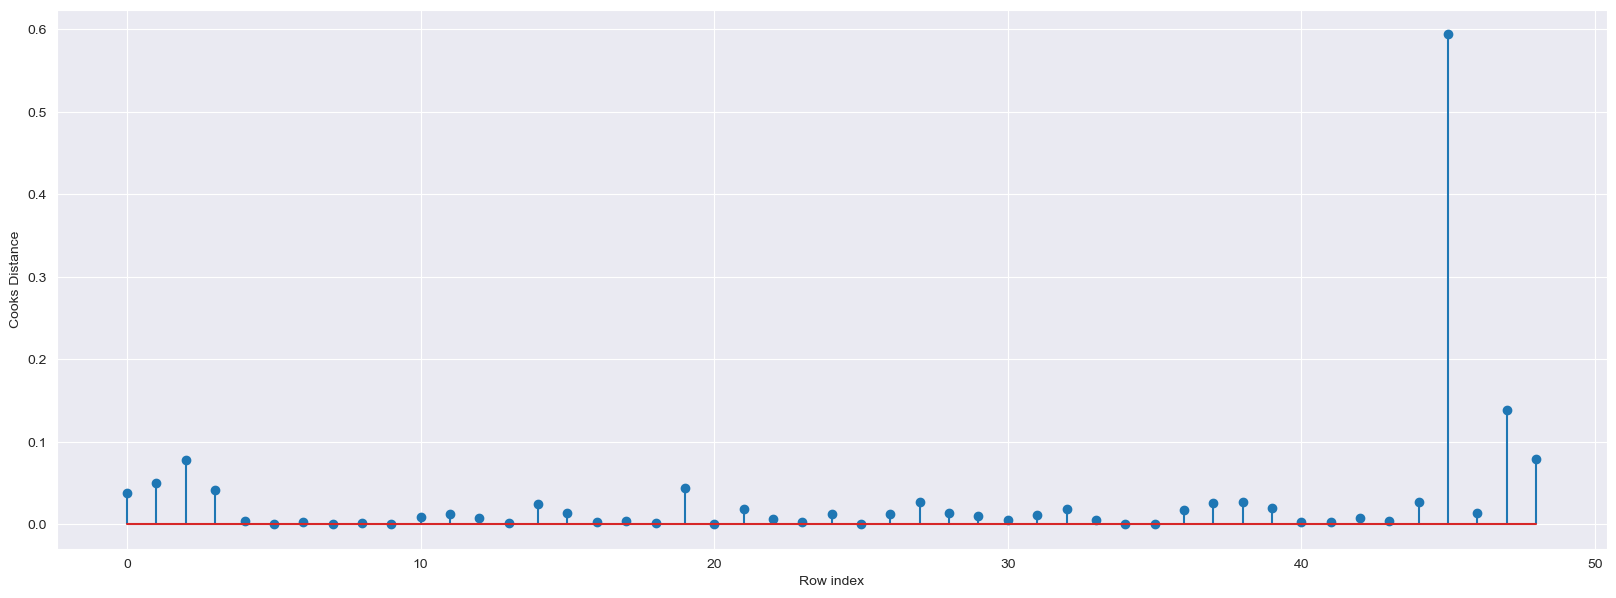

In [58]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_sqrt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:

(np.argmax(c),np.max(c)) # 45 is index number and 0.59 is cook's distance

(45, 0.5937765784611109)

In [65]:
k = df_sqrt.shape[1] # k is no of variables
n = df_sqrt.shape[0] # n is no of data points
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.375

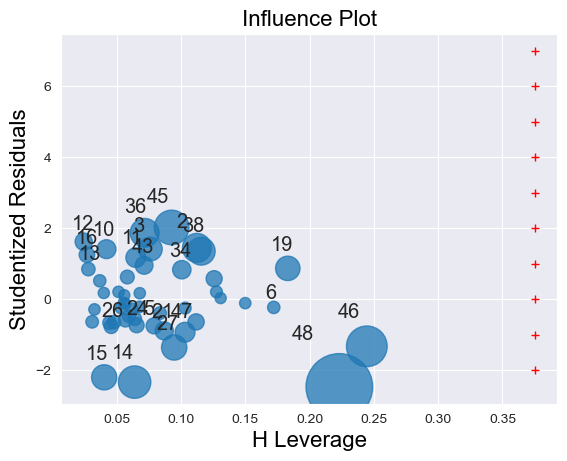

In [66]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [61]:

df_sqrt[df_sqrt.index.isin([45])]

,Spend,Administration,Marketing_Spend,Profit
45,31.626413,352.353572,43.634046,254.805965


In [63]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df_sqrt=df_sqrt.drop(df_sqrt.index[[45]],axis=0).reset_index()

# AIC

In [64]:
#Build model with Wt
import statsmodels.formula.api as smf 
model2 = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df_sqrt).fit()
f'AIC:{model2.aic}, rsq_model:{model2.rsquared}'

'AIC:384.2538960690128, rsq_model:0.9543626402023941'

# Model 3 (cube root transformation)

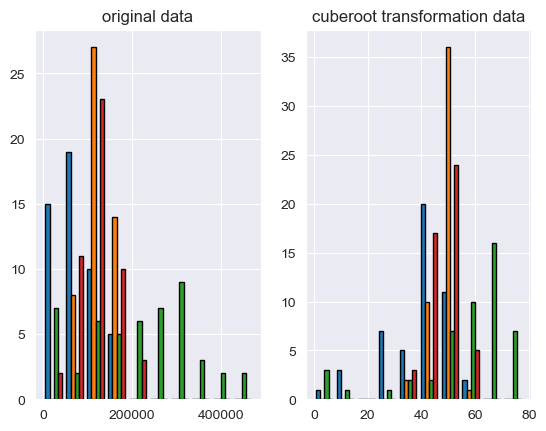

In [67]:
df_cbrt=np.cbrt(df)

#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_cbrt,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('cuberoot transformation data')
plt.show()

In [68]:
#Build model
import statsmodels.formula.api as smf 
model3 = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df_cbrt).fit()

In [69]:
#Coefficients
model3.params

Intercept          29.245271
Administration      0.027131
Marketing_Spend     0.013293
Spend               0.421582
dtype: float64

In [70]:
#t and p-Values
print(model3.tvalues, '\n', model3.pvalues)

Intercept           8.706072
Administration      0.391993
Marketing_Spend     0.659087
Spend              13.075046
dtype: float64 
 Intercept          3.310695e-11
Administration     6.969137e-01
Marketing_Spend    5.131984e-01
Spend              6.241462e-17
dtype: float64


In [71]:
#R squared values MLR
(model3.rsquared,model3.rsquared_adj)


(0.8979228357510762, 0.8911176914678146)

# VIF

In [72]:
rsq_Administration = smf.ols('Administration~Spend+Marketing_Spend',data=df_cbrt).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Spend = smf.ols('Spend~Marketing_Spend+Administration',data=df_cbrt).fit().rsquared  
vif_Spend = 1/(1-rsq_Spend) 

rsq_Marketing_Spend= smf.ols('Marketing_Spend~+Administration+Spend',data=df_cbrt).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 


# Storing vif values in a data frame
d1 = {'Variables':['Administration','Spend','Marketing_Spend'],'VIF':[vif_Administration,vif_Spend,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.142522
1,Spend,2.142029
2,Marketing_Spend,1.988856


In [73]:
# the VIf values of the all independent variables of model 3 is less then 5 so there is no multicollinearity essue

## Detecting Influencers/Outliers
### cooks distance

In [74]:


model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

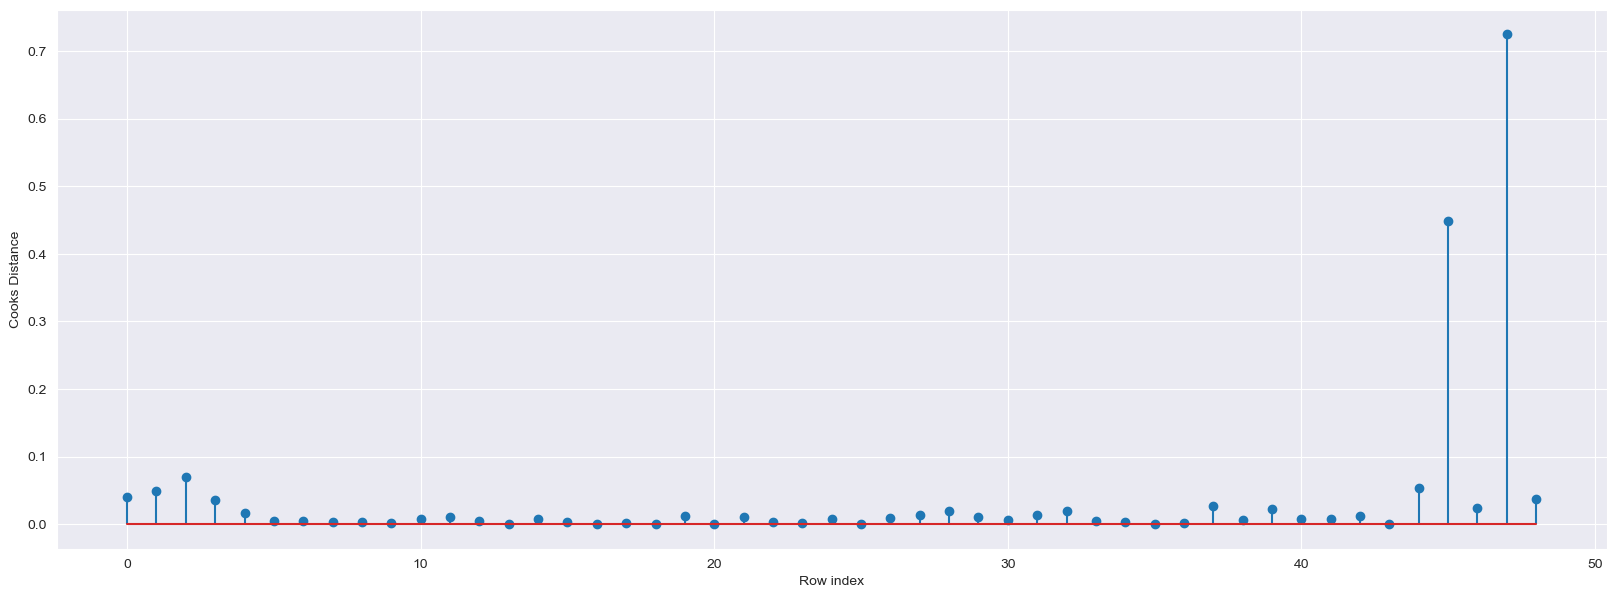

In [75]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_cbrt)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:

(np.argmax(c),np.max(c)) # 47 is index number and 0.72 is cook's distance

(47, 0.7253085035376904)

In [77]:

df_cbrt[df_cbrt.index.isin([47])]

,Spend,Administration,Marketing_Spend,Profit
47,0.0,51.353297,0.0,34.914001


In [78]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df_cbrt=df_cbrt.drop(df_cbrt.index[[45]],axis=0).reset_index()

# AIC

In [79]:
#Build model with Wt
import statsmodels.formula.api as smf 
model3 = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df_cbrt).fit()
f'AIC:{model3.aic}, rsq_model:{model3.rsquared}'

'AIC:190.40091505518285, rsq_model:0.915618608099979'

# Model 4 (MIN MAX transformation)

In [80]:
# Normalization function # use sklearn library norm
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [81]:
# Normalized data frame 
df_norm = norm_func(df.iloc[:])
df_norm.head()

,Spend,Administration,Marketing_Spend,Profit
0,1.000000,0.651744,1.000000,1.000000
1,0.983359,0.761972,0.940893,0.997000
2,0.927985,0.379579,0.864664,0.992264
3,0.873136,0.512998,0.812235,0.940226
4,0.859438,0.305328,0.776136,0.833488


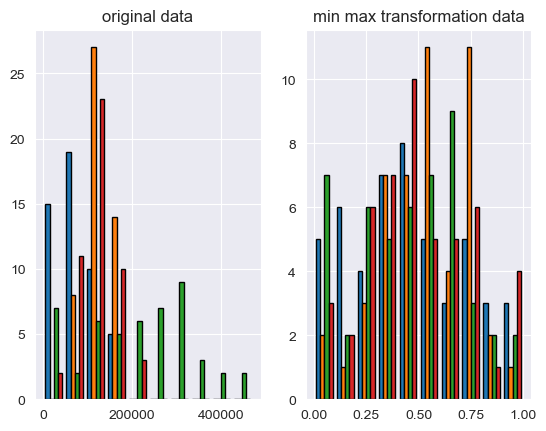

In [82]:


#define grid of plots
fig,axs=plt.subplots(nrows=1,ncols=2)

#creat histogram
axs[0].hist(df,edgecolor='black')
axs[1].hist(df_norm,edgecolor='black')

#add title
axs[0].set_title('original data')
axs[1].set_title('min max transformation data')
plt.show()

In [83]:
#Build model
import statsmodels.formula.api as smf 
model4 = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df_norm).fit()

In [84]:
#Coefficients
model4.params

Intercept          0.099436
Administration    -0.018625
Marketing_Spend    0.076026
Spend              0.826809
dtype: float64

In [85]:
#t and p-Values
print(model4.tvalues, '\n', model4.pvalues)

Intercept           4.237102
Administration     -0.517889
Marketing_Spend     1.825383
Spend              20.469501
dtype: float64 
 Intercept          1.106641e-04
Administration     6.070728e-01
Marketing_Spend    7.458443e-02
Spend              1.971077e-24
dtype: float64


In [86]:
df_norm.corr()

,Spend,Administration,Marketing_Spend,Profit
Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing_Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


In [87]:
#R squared values MLR
(model4.rsquared,model4.rsquared_adj)


(0.9613162435129847, 0.9587373264138503)

# VIF

In [88]:
rsq_Administration = smf.ols('Administration~Spend+Marketing_Spend',data=df_norm).fit().rsquared
vif_Administration = 1/(1-rsq_Administration)

rsq_Spend = smf.ols('Spend~Marketing_Spend+Administration',data=df_norm).fit().rsquared  
vif_Spend = 1/(1-rsq_Spend) 

rsq_Marketing_Spend= smf.ols('Marketing_Spend~+Administration+Spend',data=df_norm).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 


# Storing vif values in a data frame
d1 = {'Variables':['Administration','Spend','Marketing_Spend'],'VIF':[vif_Administration,vif_Spend,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175172
1,Spend,2.377754
2,Marketing_Spend,2.239957


In [89]:
# the VIF values of all independent variables are then 5 so there is no multi collinearity essue

## Detecting Influencers/Outliers
### cooks distance

In [90]:


model4_influence = model4.get_influence()
(c, _) = model4_influence.cooks_distance

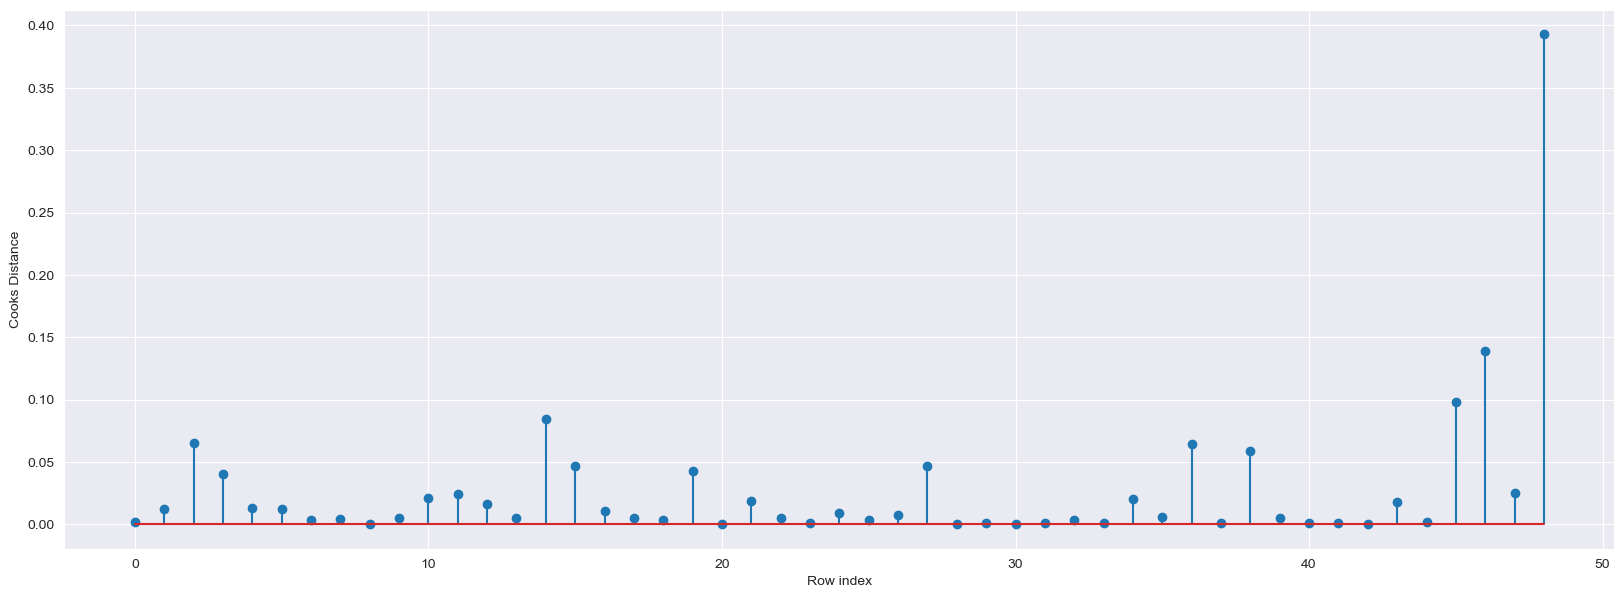

In [91]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_norm)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [92]:

(np.argmax(c),np.max(c)) # 48 is index number and 0.39 is cook's distance

(48, 0.3927442055632152)

In [93]:
# the cooks distance is less than 0.5 so there is no outlier

# AIC

In [94]:
#Build model with Wt
import statsmodels.formula.api as smf 
model4 = smf.ols('Profit~Administration+Marketing_Spend+Spend',data=df_norm).fit()
f'AIC:{model4.aic}, rsq_model:{model4.rsquared}'

'AIC:-151.64956166492615, rsq_model:0.9613162435129847'

In [95]:
d2={
    'Prep_Models':['Model','sqrt transformation','cbrt transformation','min max transformation'],
    'Rsquared':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared]

   }
table=pd.DataFrame(d2)
table.index = np.arange(1, len(table) + 1)

table


,Prep_Models,Rsquared
1,Model,0.961316
2,sqrt transformation,0.954363
3,cbrt transformation,0.915619
4,min max transformation,0.961316


In [96]:
# conclusion: Model 1 and Model 4(min max transformation ) is best model beacuse it have high Rsquared

In [97]:
d2={
    'Prep_Models':['Model','sqrt transformation','cbrt transformation','min max transformation'],
    'Rsquared':[model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
    'AIC':[model.aic,model2.aic,model3.aic,model4.aic]
   }
table=pd.DataFrame(d2)
table.index = np.arange(1, len(table) + 1)

table


,Prep_Models,Rsquared,AIC
1,Model,0.961316,1020.565297
2,sqrt transformation,0.954363,384.253896
3,cbrt transformation,0.915619,190.400915
4,min max transformation,0.961316,-151.649562


## FINAL CONCLUSION:. Model 4 (min max Transformation) is best model because it has high Rsquared values and low AIC values

In [101]:
# to see the model prediction
model4.fittedvalues

0     0.990132
1     0.969827
2     0.925369
3     0.873549
4     0.863347
5     0.810463
6     0.779546
7     0.789805
8     0.738595
9     0.757166
10    0.637559
11    0.637336
12    0.598270
13    0.588209
14    0.725609
15    0.704168
16    0.522160
17    0.604995
18    0.596825
19    0.517073
20    0.519989
21    0.525183
22    0.508178
23    0.478514
24    0.500533
25    0.432501
26    0.484546
27    0.506058
28    0.430133
29    0.430327
30    0.414992
31    0.404978
32    0.412881
33    0.404174
34    0.350466
35    0.357855
36    0.264433
37    0.351553
38    0.228367
39    0.315949
40    0.261527
41    0.260675
42    0.235132
43    0.171907
44    0.200221
45    0.094412
46    0.144743
47    0.087506
48    0.102081
dtype: float64

In [102]:
# error
model4.resid

0     0.009868
1     0.027173
2     0.066894
3     0.066677
4    -0.029859
5    -0.035708
6    -0.010338
7    -0.022959
8     0.005639
9    -0.028590
10    0.067784
11    0.056112
12    0.078102
13    0.041684
14   -0.106603
15   -0.102312
16    0.061022
17   -0.032175
18   -0.031052
19    0.039185
20    0.008789
21   -0.042136
22   -0.031266
23   -0.011937
24   -0.035118
25    0.025585
26   -0.037130
27   -0.063273
28    0.001629
29   -0.013111
30   -0.004591
31   -0.010248
32   -0.018506
33   -0.013943
34    0.039342
35    0.030463
36    0.087028
37   -0.004939
38    0.062559
39   -0.026449
40    0.010310
41    0.008345
42   -0.006347
43    0.045769
44   -0.011657
45    0.092400
46   -0.056503
47   -0.043528
48   -0.102081
dtype: float64